# Friday class

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [16]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
len(x_train)

60000

In [18]:
len(x_test)

10000

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

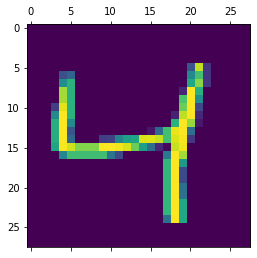

In [21]:
plt.matshow(x_train[2])

In [22]:
y_train[2]

4

In [23]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
x_train.shape

(60000, 28, 28)

# scaled data between 0 and 1

In [25]:
x_train=x_train/255
x_test=x_test/255

In [26]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# now we convert the 2d matrix into 1D array

In [27]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x_train_flattened.shape

(60000, 784)

In [33]:
x_test_flattened=x_test.reshape(len(x_test),28*28)


In [34]:
x_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x_test_flattened.shape

(10000, 784)

In [37]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# building a single layer model

In [41]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(
  optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4687 - acc: 0.8779
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3029 - acc: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - acc: 0.9201
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - acc: 0.9243
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - acc: 0.9259


# evaluate the model

In [46]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - acc: 0.9241


[0.26577553153038025, 0.9240999817848206]

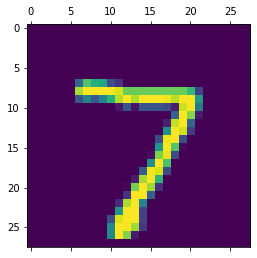

In [51]:
plt.matshow(x_test[0])

# prediction

In [53]:
y_pred=model.predict(x_test_flattened)
y_pred[1]

313/313 [==============================] - 1s 2ms/step


array([3.1562448e-01, 8.7201390e-03, 9.9969465e-01, 4.6354616e-01,
       1.3329527e-09, 8.7748927e-01, 8.8049310e-01, 7.0450205e-13,
       1.7045489e-01, 2.9896459e-09], dtype=float32)

In [54]:
np.argmax(y_pred[1])

2

In [55]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [57]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# confusion matrix

In [58]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    4,    3,    0,    8,   11,    3,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  921,   19,    8,    4,   12,   10,   41,    5],
       [   1,    0,   15,  931,    0,   20,    2,    9,   26,    6],
       [   1,    1,    3,    2,  908,    0,   11,    4,   10,   42],
       [   7,    2,    3,   40,   10,  768,   15,    6,   34,    7],
       [   7,    3,    4,    1,    7,   13,  918,    2,    3,    0],
       [   1,    6,   20,   11,    8,    0,    0,  948,    3,   31],
       [   4,    8,    6,   26,    9,   22,    9,   12,  872,    6],
       [   8,    7,    2,    9,   25,    6,    0,   26,   11,  915]])>

# visualize the confusion matrix

Text(69.0, 0.5, 'Truth')

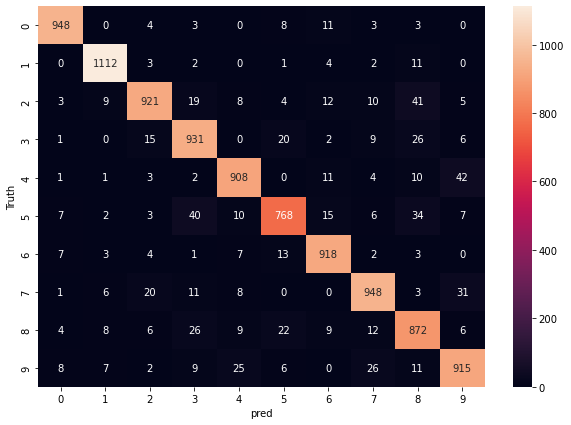

In [59]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

# add a hiden layer

In [68]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                             keras.layers.Dense(10,activation='sigmoid')])

In [69]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [70]:
model.fit(x_train_flattened,y_train,batch_size=10,epochs=5)

Epoch 1/5
6000/6000 [==============================] - 22s 4ms/step - loss: 0.2246 - acc: 0.9348
Epoch 2/5
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0999 - acc: 0.9697
Epoch 3/5
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0704 - acc: 0.9783
Epoch 4/5
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0530 - acc: 0.9831
Epoch 5/5
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0440 - acc: 0.9859


Text(69.0, 0.5, 'Truth')

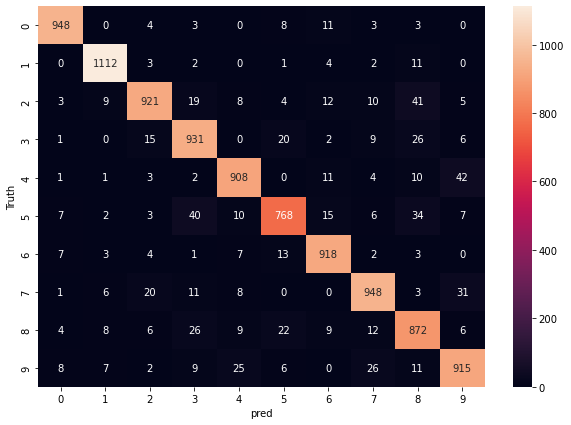

In [71]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

# model with a flatten layer

In [72]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
  optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2758 - acc: 0.9218
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - acc: 0.9630
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0869 - acc: 0.9736
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - acc: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - acc: 0.9838


In [73]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - acc: 0.9781


[0.07284999638795853, 0.9781000018119812]

Text(69.0, 0.5, 'Truth')

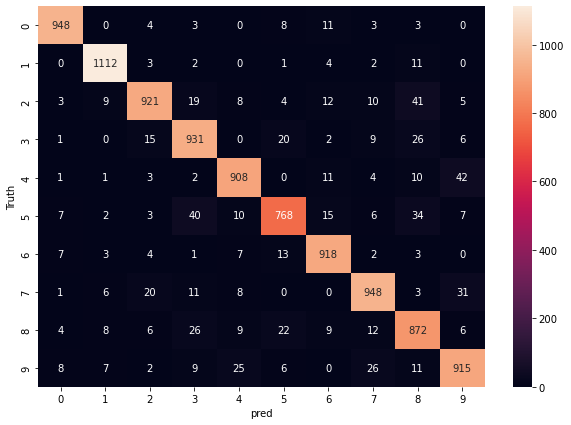

In [74]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')